In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/umang datasets/ptsd.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,How often do you experience flashbacks or intrusive memories of a traumatic event?,Do you find it difficult to feel positive emotions or enjoy activities?,How frequently do you feel on edge or easily startled?,"Do you avoid reminders of the trauma, such as places or people?",How often do you feel disconnected from others?,Do you have trouble sleeping due to distressing thoughts?,How often do you feel irritable or have angry outbursts?,"When thinking about the trauma, how often do you feel overwhelmed?",How frequently do you have difficulty concentrating?,Do you find yourself avoiding talking about the traumatic experience?,Final Score
0,2,4,2,4,4,1,3,2,2,1,54.083067
1,3,3,4,4,4,4,3,4,4,3,81.712460
2,2,3,1,2,3,2,4,1,1,0,42.325879
3,1,4,3,0,1,2,2,3,3,1,49.968051
4,1,3,4,3,0,0,4,2,1,3,61.725240


In [ ]:
df.describe()

,How often do you experience flashbacks or intrusive memories of a traumatic event?,Do you find it difficult to feel positive emotions or enjoy activities?,How frequently do you feel on edge or easily startled?,"Do you avoid reminders of the trauma, such as places or people?",How often do you feel disconnected from others?,Do you have trouble sleeping due to distressing thoughts?,How often do you feel irritable or have angry outbursts?,"When thinking about the trauma, how often do you feel overwhelmed?",How frequently do you have difficulty concentrating?,Do you find yourself avoiding talking about the traumatic experience?,Final Score
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.431500,2.427000,2.45875,2.454750,2.413500,2.482000,2.447250,2.446250,2.459500,2.444250,60.613671
std,1.294305,1.288055,1.29082,1.297256,1.315846,1.290191,1.293111,1.311694,1.287352,1.295111,13.988190
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.284345
25%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,50.261981
50%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,59.961661
75%,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,70.910543
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,92.000000


In [ ]:
col_name = 0
for col in df.columns:
    df.rename(columns={col: str(col_name)}, inplace=True)
    col_name += 1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,4,2,4,4,1,3,2,2,1,54.083067
1,3,3,4,4,4,4,3,4,4,3,81.712460
2,2,3,1,2,3,2,4,1,1,0,42.325879
3,1,4,3,0,1,2,2,3,3,1,49.968051
4,1,3,4,3,0,0,4,2,1,3,61.725240


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop('10', axis=1)
y = df['10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')


MAE: 4.496906413230896, MSE: 28.858134665589915, R²: 0.8460623051929366


In [ ]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,31.744409,41.902620
1,57.316294,54.274121
2,90.824281,83.303390
3,77.009585,80.928647
4,55.552716,60.831693
5,77.597444,79.781342
6,62.607029,56.555996
7,44.089457,55.188243
8,68.191693,62.158786
9,59.079872,61.240256


<Figure size 2400x1200 with 0 Axes>

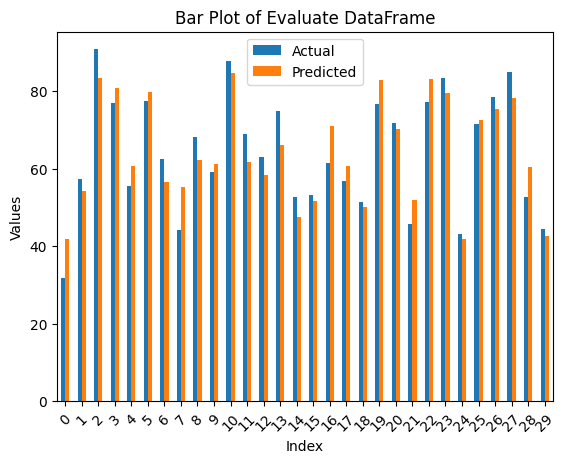

In [ ]:
plt.figure(figsize=(24, 12))
evaluate.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Fitting the training data to our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)


0.9037052911094363

In [ ]:
# predict the y values
y_pred_lin_reg=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate_lin_reg = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred_lin_reg.flatten()})
evaluate_lin_reg.head(10)

,Actual,Predicted
0,31.744409,34.236318
1,57.316294,54.129549
2,90.824281,84.975272
3,77.009585,80.266898
4,55.552716,61.010167
5,77.597444,80.545531
6,62.607029,56.978736
7,44.089457,49.429625
8,68.191693,65.907271
9,59.079872,61.527047


<Figure size 2400x1200 with 0 Axes>

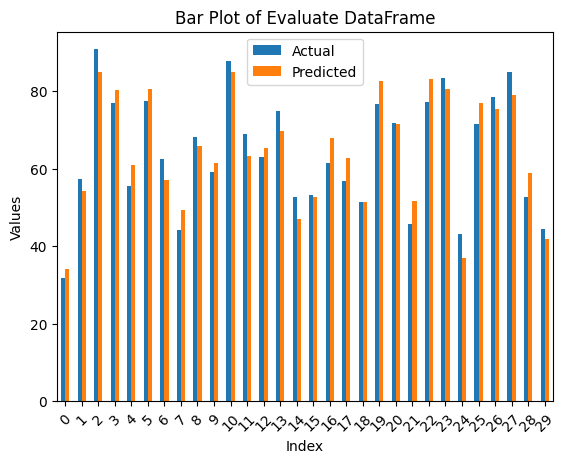

In [ ]:
plt.figure(figsize=(24, 12))
evaluate_lin_reg.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
with open(f'lin_reg_ptsd_model.pkl', 'wb') as file:
        pickle.dump(regressor, file)

In [ ]:
with open('lin_reg_ptsd_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(np.array([[1,1,2,4,1,2,0,0,1,2]]))
print("Predictions:", predictions)

Predictions: [37.40939685]
